
# Ejercicio k-Nearest Neighbor (kNN)



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function

# Unas configuraciones adicionales para que las figuras aparezcan "inline"
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

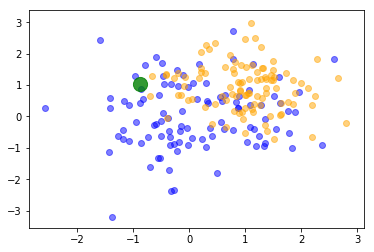

In [25]:
n_points = 100

x_train1 = np.random.multivariate_normal([0, 0], [[1, 0],[0, 1]], n_points)
x_train2 = np.random.multivariate_normal([1, 1], [[0.5, 0], [0, 0.5]], n_points)
x_train = np.vstack((x_train1, x_train2))

y_train = np.hstack((np.ones(n_points, dtype=np.int), 2 * np.ones(n_points, dtype=np.int)))

x_test = np.random.multivariate_normal([0.5, 0.5], [[2, 0],[0, 2]], 1)

colors = ['', 'blue', 'orange']
plt.figure()
plt.scatter(x_train1[:, 0], x_train1[:, 1], color=colors[1], alpha=0.5)
plt.scatter(x_train2[:, 0], x_train2[:, 1], color=colors[2], alpha=0.5)
plt.scatter(x_test[0, 0], x_test[0, 1], color='green', s=200, alpha=0.8)

La clase asignada a la nueva muestra es: 1


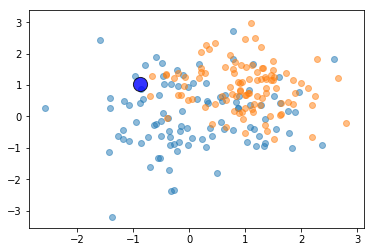

In [26]:
K = 5

d = np.sqrt((x_train[:, 0] - x_test[0, 0]) ** 2 + (x_train[:, 1] - x_test[0, 1]) ** 2)

idxs = np.argsort(d)[:K]
y_test = np.int64(np.median(y_train[idxs]))

print("La clase asignada a la nueva muestra es: {0}".format(y_test))

plt.figure()
plt.scatter(x_train1[:, 0], x_train1[:, 1], alpha=0.5)
plt.scatter(x_train2[:, 0], x_train2[:, 1], alpha=0.5)
plt.scatter(x_test[0, 0], x_test[0, 1], color=colors[y_test], s=200, alpha=0.8, edgecolor='k')

## FIN!